### Här ska jag testa implementera 3 olika metoder
Jag har ej uppdaterat requirements, får kolla på det senare

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('data/mnist_train_sample.csv')
df_test = pd.read_csv('data/mnist_test_sample.csv')

X_train = df_train.drop(columns=['label'])
y_train = df_train['label']

X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# KNN

In [3]:
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy}')

Noggrannhet: 0.945


## RandomForest

In [4]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy}')

Noggrannhet: 0.949


## XGBoost

In [5]:

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy}')

Noggrannhet: 0.949


## TESTING TESTING

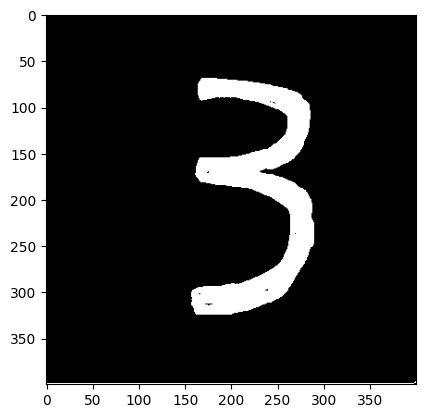

In [6]:
import cv2 
import matplotlib.pyplot as plt

# Load sample image
file = "drawn_images/20240603_152006.png"
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if test_image is None:
    print("Error: Unable to load the image.")
else:
    # Thresholding to separate lines from background
    _, thresholded_image = cv2.threshold(test_image, 127, 255, cv2.THRESH_BINARY)
    
    # Invert the image if necessary
    inverted_image = 255 - thresholded_image
    
    # Preview the modified image
    plt.imshow(inverted_image, cmap='gray')
    plt.show()


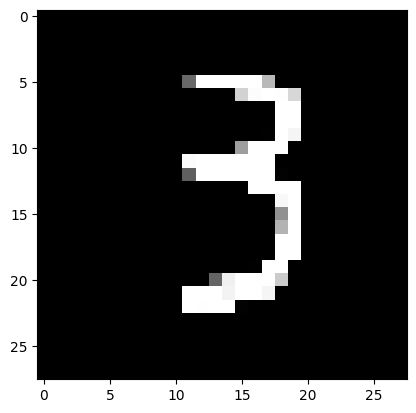

In [9]:
# Format Image
img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

# Preview reformatted image
plt.imshow(img_resized, cmap='gray')

In [10]:
img_flattened = img_resized.reshape(1, -1)

# Predict the label of the test image
y_pred = clf.predict(img_flattened)

# Print the predicted label
print(f'Predicted label: {y_pred[0]}')

Predicted label: 3


c:\Users\Jensh\Desktop\utbildning\kurs5\Teckenigenkanning\teckenigenk-nning-g1\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
